In [0]:
from fastai import *
from fastai.vision import *

In [0]:
#from google.colab import files
#files.upload()

In [3]:

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
path=Path('drive/My Drive/chest_xray/Training')
path.ls()

[PosixPath('drive/My Drive/chest_xray/Training/Cardiomegaly'),
 PosixPath('drive/My Drive/chest_xray/Training/Atelectasis'),
 PosixPath('drive/My Drive/chest_xray/Training/Effusion'),
 PosixPath('drive/My Drive/chest_xray/Training/Fibrosis'),
 PosixPath('drive/My Drive/chest_xray/Training/Infiltration'),
 PosixPath('drive/My Drive/chest_xray/Training/models')]

In [0]:
classes=['Cardiomegaly','Atelectasis','Effusion','Fibrosis','Infiltration']

In [0]:
tfms=get_transforms()

In [0]:
src=(ImageList.from_folder(path).split_by_rand_pct(0.2))

In [0]:
data=(src.label_from_folder()
      .transform(tfms,size=356)
      .databunch(bs=24)
      .normalize(imagenet_stats))

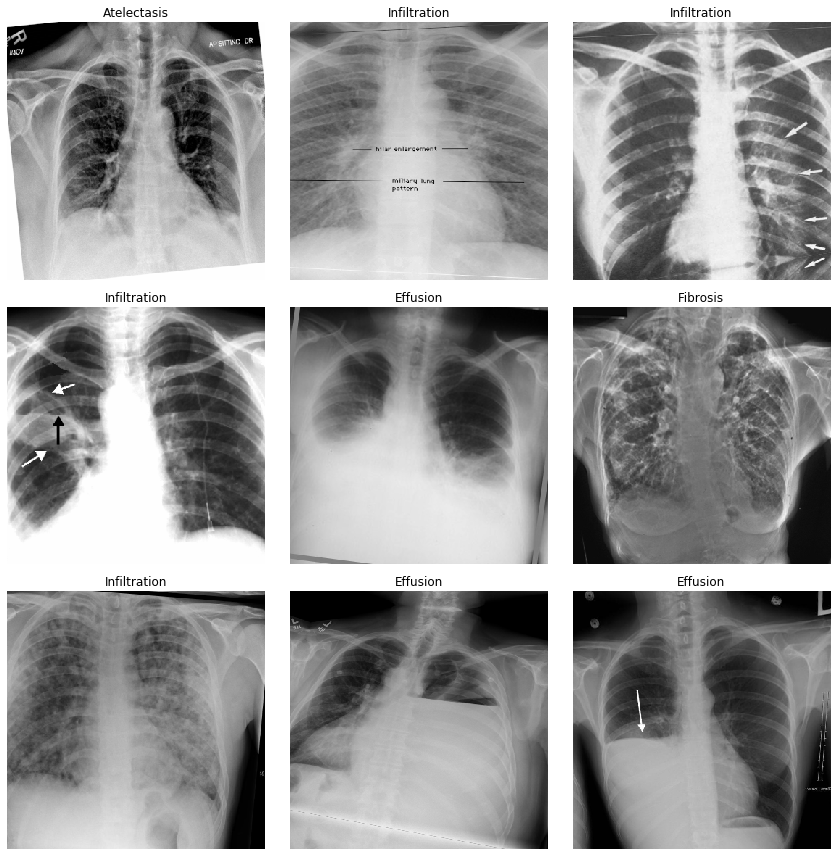

In [9]:
data.show_batch(rows=3)

In [10]:
learn= cnn_learner(data, models.resnet101, metrics=accuracy )

Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /root/.cache/torch/checkpoints/resnet101-5d3b4d8f.pth
100%|██████████| 170M/170M [00:01<00:00, 115MB/s]


In [14]:

learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


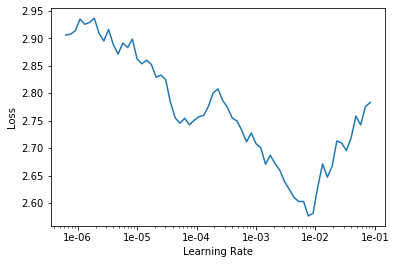

In [15]:
learn.recorder.plot(skip_end=15)

In [16]:
learn.fit_one_cycle(3, max_lr=slice(1e-03))

epoch,train_loss,valid_loss,accuracy,time
0,2.619870,1.648523,0.449438,01:19
1,2.176220,2.039788,0.421348,00:39
2,1.956112,1.700552,0.516854,00:38


KeyboardInterrupt: ignored

In [0]:
learn.save('stage1')

In [18]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


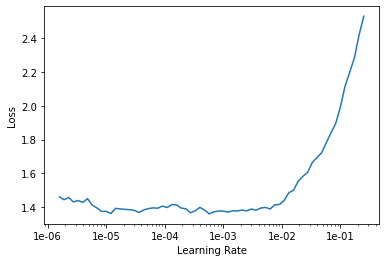

In [20]:
learn.recorder.plot(15)

In [22]:
learn.fit_one_cycle(3, max_lr=slice(1e-05))

epoch,train_loss,valid_loss,accuracy,time
0,1.388443,1.687998,0.511236,00:39
1,1.380401,1.669569,0.500000,00:38
2,1.435464,1.629324,0.511236,00:39


In [0]:
learn.load('stage1');

In [0]:
learn.unfreeze()

In [25]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


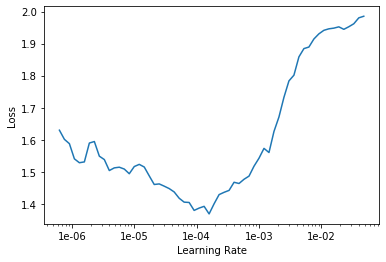

In [26]:
learn.recorder.plot(skip_end=15
                    )

In [0]:
learn.save('stage1')

In [27]:
learn.fit_one_cycle(3, max_lr=slice(1e-04/(2.6**4),1e-04))

epoch,train_loss,valid_loss,accuracy,time
0,1.476776,1.610782,0.528090,00:44
1,1.330736,1.566030,0.550562,00:43
2,1.236907,1.594088,0.522472,00:43


In [28]:
learn.fit_one_cycle(3, max_lr=slice(1e-04/(2.6**4),1e-04))

epoch,train_loss,valid_loss,accuracy,time
0,1.127692,1.497834,0.556180,00:43


KeyboardInterrupt: ignored

In [0]:
learn.save('stage2')

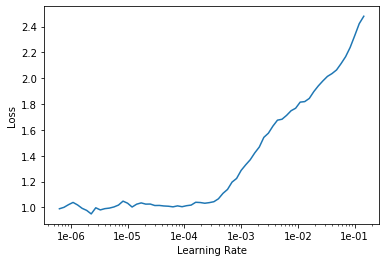

In [30]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


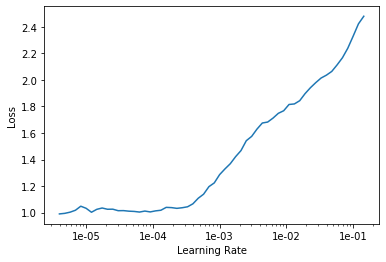

In [33]:
learn.recorder.plot(20)

In [34]:
learn.fit_one_cycle(4, max_lr=slice(1e-04/(2.6**4),1e-04))

epoch,train_loss,valid_loss,accuracy,time
0,1.081290,1.508584,0.556180,00:44
1,1.011670,1.426654,0.595506,00:43


KeyboardInterrupt: ignored

In [0]:
learn.save('stage3')

In [36]:
learn.fit_one_cycle(4, max_lr=slice(1e-04/(2.6**4),1e-04))

epoch,train_loss,valid_loss,accuracy,time
0,0.879660,1.423901,0.578652,00:45
1,0.895853,1.474041,0.606742,00:44


KeyboardInterrupt: ignored

In [0]:
learn.save('stage4')

In [0]:
learn.load('stage4');

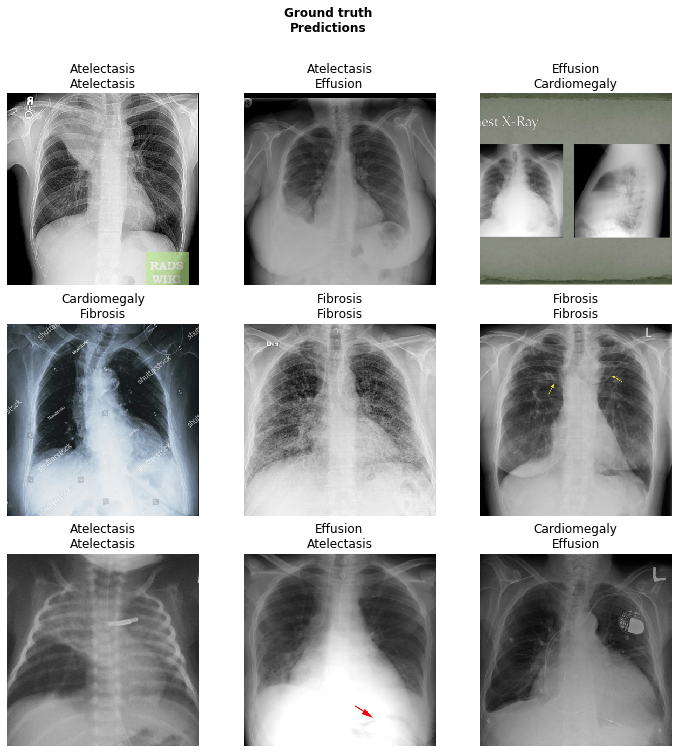

In [41]:
learn.show_results(rows=3)

In [0]:
interpret=ClassificationInterpretation.from_learner(learn)

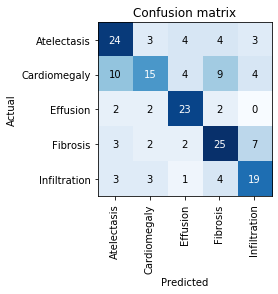

In [43]:
interpret.plot_confusion_matrix()

In [44]:
interpret.most_confused()

[('Cardiomegaly', 'Atelectasis', 10),
 ('Cardiomegaly', 'Fibrosis', 9),
 ('Fibrosis', 'Infiltration', 7),
 ('Atelectasis', 'Effusion', 4),
 ('Atelectasis', 'Fibrosis', 4),
 ('Cardiomegaly', 'Effusion', 4),
 ('Cardiomegaly', 'Infiltration', 4),
 ('Infiltration', 'Fibrosis', 4),
 ('Atelectasis', 'Cardiomegaly', 3),
 ('Atelectasis', 'Infiltration', 3),
 ('Fibrosis', 'Atelectasis', 3),
 ('Infiltration', 'Atelectasis', 3),
 ('Infiltration', 'Cardiomegaly', 3),
 ('Effusion', 'Atelectasis', 2),
 ('Effusion', 'Cardiomegaly', 2),
 ('Effusion', 'Fibrosis', 2),
 ('Fibrosis', 'Cardiomegaly', 2),
 ('Fibrosis', 'Effusion', 2),
 ('Infiltration', 'Effusion', 1)]

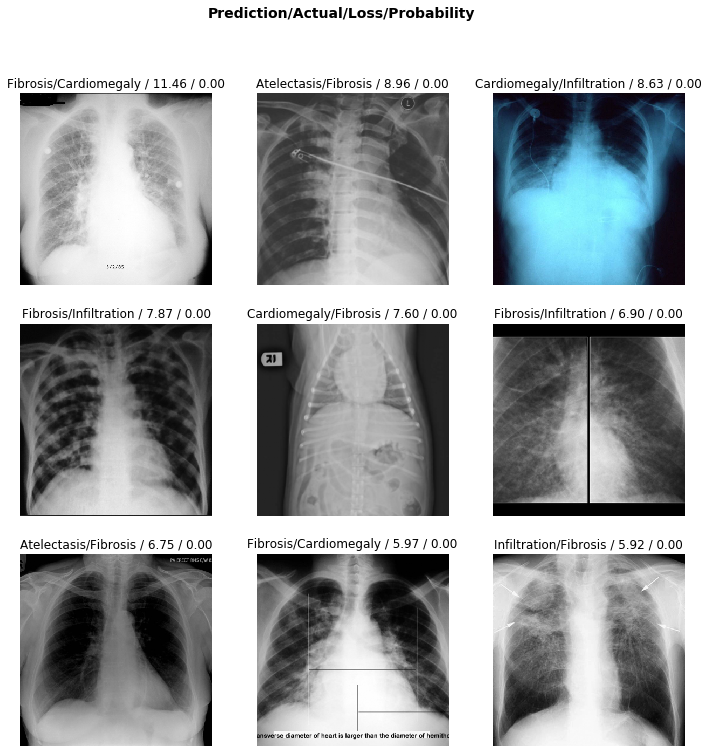

In [45]:
interpret.plot_top_losses(9,figsize=(12,12))

In [0]:
learn.export('chest_xray.pkl')